In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

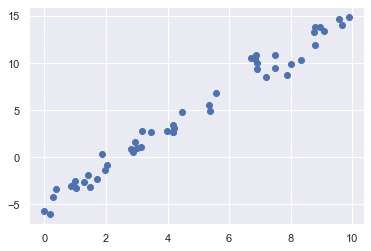

In [67]:
# create data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

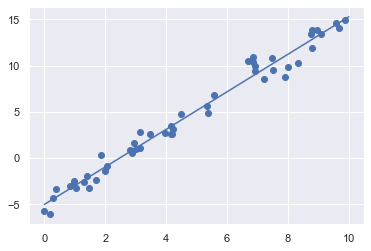

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [71]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.5
Model intercept: 0.5000000000000109


In [73]:
# multidimension
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # 100 3-dimension array
y = 0.5 + np.dot(X, [1.5, -2., 1.]) # dot product of two arrays, which is a 100*1 matrix

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000109
[ 1.5 -2.   1. ]


In [143]:
# Polynomial basis functions
# increase the dimensions which actually is increasing the parameters to be determined in the model
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(2, include_bias=False) # do not include 1
poly.fit_transform(x[:, None]) # x[:, None] is 3*1 matrix

array([[ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

In [77]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

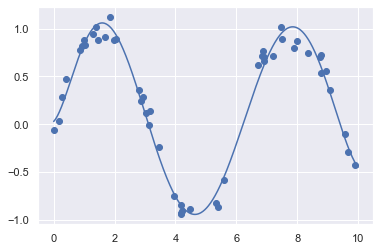

In [79]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis]) # xfit = np.linspace(0, 10, 1000)

plt.scatter(x, y)
plt.plot(xfit, yfit);

call fit in GaussianFeatures
call transform in GaussianFeatures
fit done
call transform in GaussianFeatures


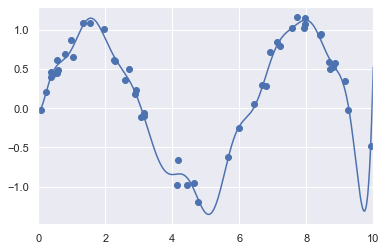

In [165]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
# Gaussian basis functions
# y = A1G1(x) + A2G2(x) + ... + AnGn(x), Gi(x) is gaussian function with centers spread along the data range, and fixed width determined by range of x and N
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    # x data, y centers (easy to be confused with y = f(x))
    # it will simply return N elements for each x, which is G1(x)...Gn(x) 
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        # print(f"this is the shape of x: {np.shape(x)}")
        # print(x)
        # print(f"this is y: {y}")
        # print(y)
        # print(f"this is the shape of arg: {np.shape(arg)}")
        # print(arg)
        # print(f"this is arg^2: {arg ** 2}")
        # print(f"this is sum of arg^2, axis = 1: {np.sum(arg ** 2, axis)}")
        return np.exp(-0.5 * np.sum(arg ** 2, axis)) # Axis or axes along which a sum is performed
        
    def fit(self, X, y=None):
        print("call fit in GaussianFeatures")
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        print("call transform in GaussianFeatures")
        # x it self is a matrix, the return will increase its dimenson again
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), # N = 20
                            LinearRegression())
# it will call fit then transform in GaussianFeatures
gauss_model.fit(x[:, np.newaxis], y) # x is a 50*1 matrix, y is a 50 array

print("fit done")

# it will call transform in GaussianFeatures
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [166]:
# example
x = np.array([1, 2])
gauss = GaussianFeatures(2)
gauss.fit_transform(x[:, None]) 

call fit in GaussianFeatures
call transform in GaussianFeatures


array([[1.       , 0.8824969],
       [0.8824969, 1.       ]])